<a href="https://colab.research.google.com/github/AlanLinsAlves/Projetos_Pessoais/blob/main/grafico_balanco_hidrico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importando Bibliotecas e Carregando os Dados

In [1]:
#Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Lendo planilha excel
dados = pd.read_excel('/content/dados_balaco_hidrico_Joao_Pessoa.xlsx', skiprows = [0, 14], index_col = 'Mês')

In [3]:
#Visualizando os dados
dados

,T°C,P,ETP,P-ETP,ARM VAL,ARM ALT,ETR,DEF,EXC,ESC
Mês,,,,,,,,,,
Jan,NaN,73.9,188.3,-114.4,0.0,0,73.9,114.4,0.0,NaN
Fev,NaN,105.4,175.9,-70.5,0.0,0,105.4,70.5,0.0,NaN
Mar,NaN,193.9,193.4,0.5,0.5,"+0,5",193.4,0.0,0.0,NaN
Abr,NaN,280.4,178.5,101.9,100.0,"+101,9",178.5,0.0,2.4,NaN
Mai,NaN,284.0,167.1,116.9,100.0,0,167.1,0.0,116.9,NaN
Jun,NaN,355.2,139.7,215.5,100.0,0,139.7,0.0,215.5,NaN
Jul,NaN,302.4,131.2,171.2,100.0,0,131.2,0.0,171.2,NaN
Ago,NaN,156.4,135.4,21.0,100.0,0,135.4,0.0,21.0,NaN
Set,NaN,68.6,146.7,-78.1,21.9,-78.1,146.7,0.0,0.0,NaN


#### Plotando a Série Temporal

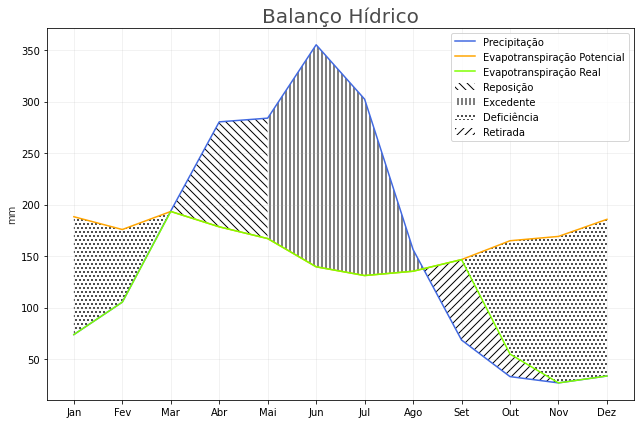

In [4]:
#Definindo figura e eixos
fig, ax = plt.subplots(1, 1, figsize = (9,6))

#Plotando as curvas de precipitação, Evapotranspiações Potencial e Real
ax.plot(dados.index, dados.P, c = 'royalblue', label = 'Precipitação')
ax.plot(dados.index, dados.ETP, c = 'orange', label = 'Evapotranspiração Potencial')
ax.plot(dados.index, dados.ETR, c = 'chartreuse', label = 'Evapotranspiração Real')

#Hachurando onde a curva de Precipitação está acima da curva de
#Evapotranspiração Potencial/Real até o mês de maio, onde ocorre a total reposição de água no solo.
ax.fill_between(dados.index[:5], dados.P.iloc[:5], dados.ETP.iloc[:5], 
                where= (dados.P.iloc[:5] >= dados.ETP.iloc[:5]), 
                facecolor='white', 
                hatch = '\\\\\\',
                interpolate = True, label = 'Reposição')

#Hachurando onde a curva de Precipitação está acima da curva de
#Evapotranspiração Potencial/Real do mês de maio em diante.
ax.fill_between(dados.index[4:], dados.P.iloc[4:], dados.ETP.iloc[4:], 
                where= (dados.P.iloc[4:] >= dados.ETP.iloc[4:]), 
                facecolor='white', 
                hatch = '|||',
                interpolate = True, label = 'Excedente')

#Hachurando onde a curva de Precipitação está abaixo da curva de Evapotranspiração Potencial
ax.fill_between(dados.index, dados.P, dados.ETP, 
                where= (dados.P <= dados.ETP), 
                facecolor='white', 
                hatch = '...',
                interpolate = True, label = 'Deficiência')

#Hachurando onde a curva de Precipitação está abaixo da curva de Evapotranspiração Real
ax.fill_between(dados.index, dados.P, dados.ETR, 
                where= (dados.P <= dados.ETR), 
                facecolor='white', 
                hatch = '///',
                interpolate = True, label = 'Retirada')

#Definindo o grig, título do gráfico, texto do eixo y e caixa de legenda
ax.grid(alpha = 0.2)
ax.set_title('Balanço Hídrico', fontsize = 20, alpha = 0.7)
ax.set_ylabel('mm', alpha = 0.8)
ax.legend()

#Mostrando gráfico resultante
plt.tight_layout()
plt.show()